# Notebook 2:  Clustering con GMM y Algoritmos Jerárquicos

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [1]:
#install.packages('mclust')

In [2]:
library(mclust)
library(cluster)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

Warning message:
"package 'mclust' was built under R version 3.6.3"Package 'mclust' version 5.4.6
Type 'citation("mclust")' for citing this R package in publications.
Warning message:
"package 'cluster' was built under R version 3.6.3"

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 3 components: 

 log-likelihood  n df       BIC       ICL
      -144.2366 25 52 -455.8548 -455.8584

Clustering table:
 1  2  3 
14  5  6 

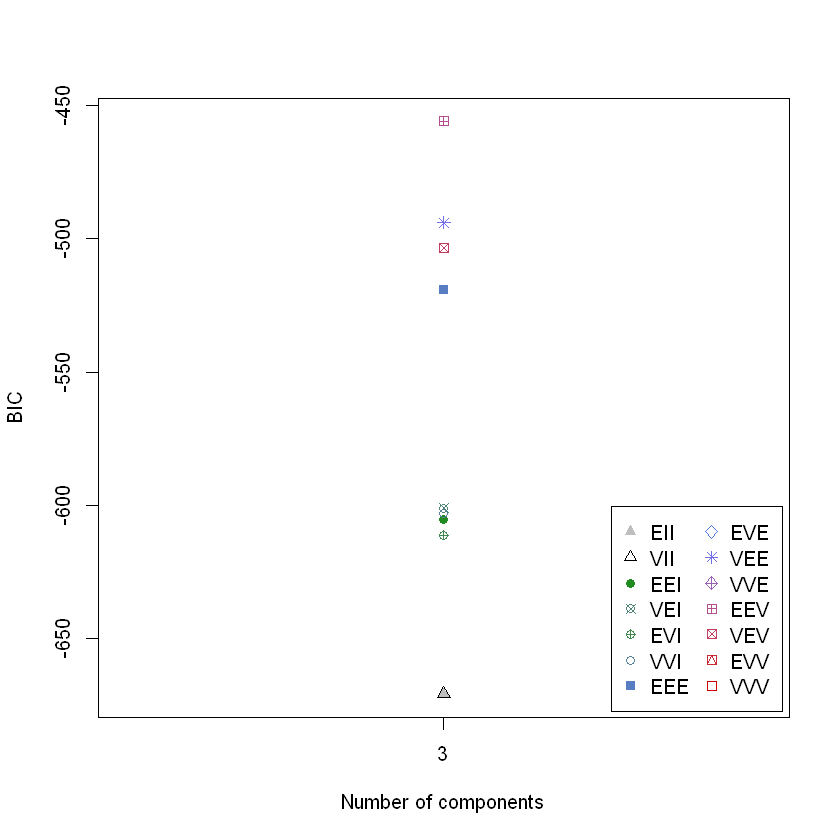

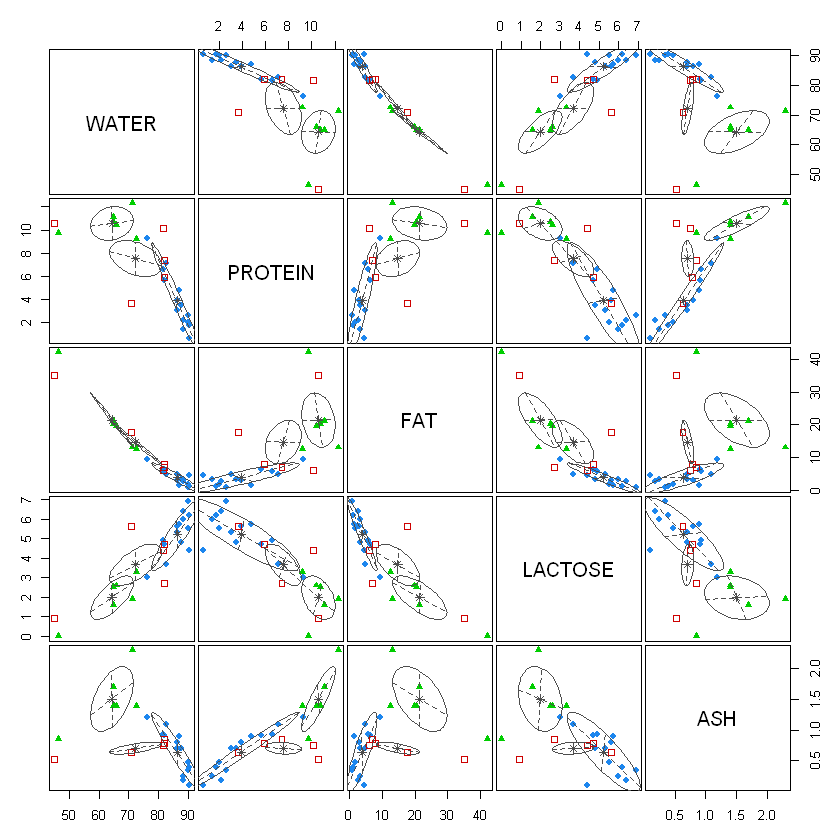

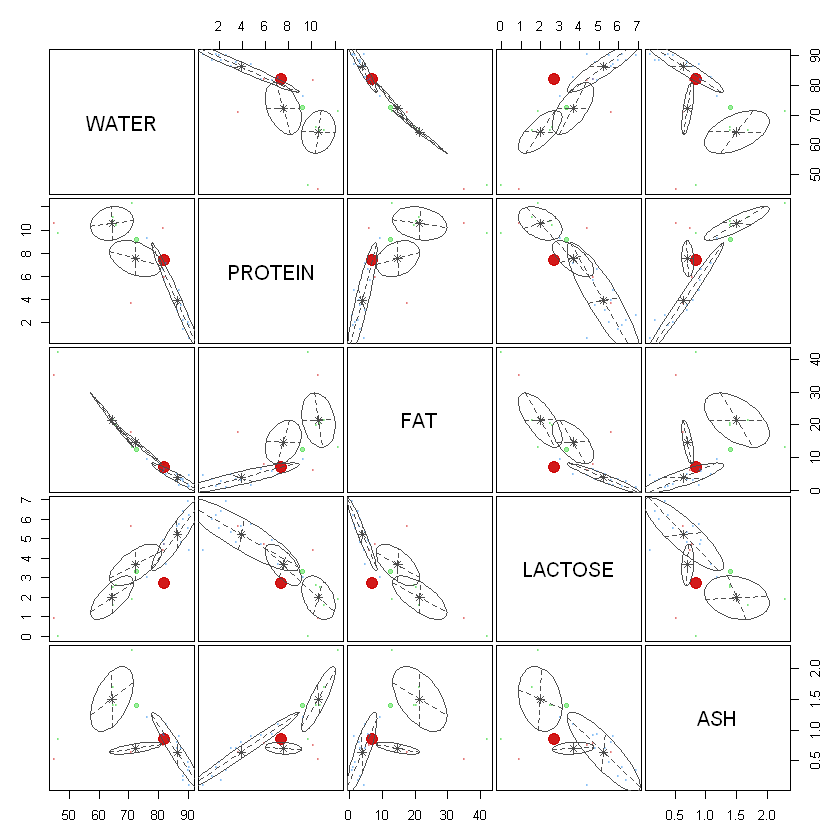

'Mclust' model object: (EEV,3) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

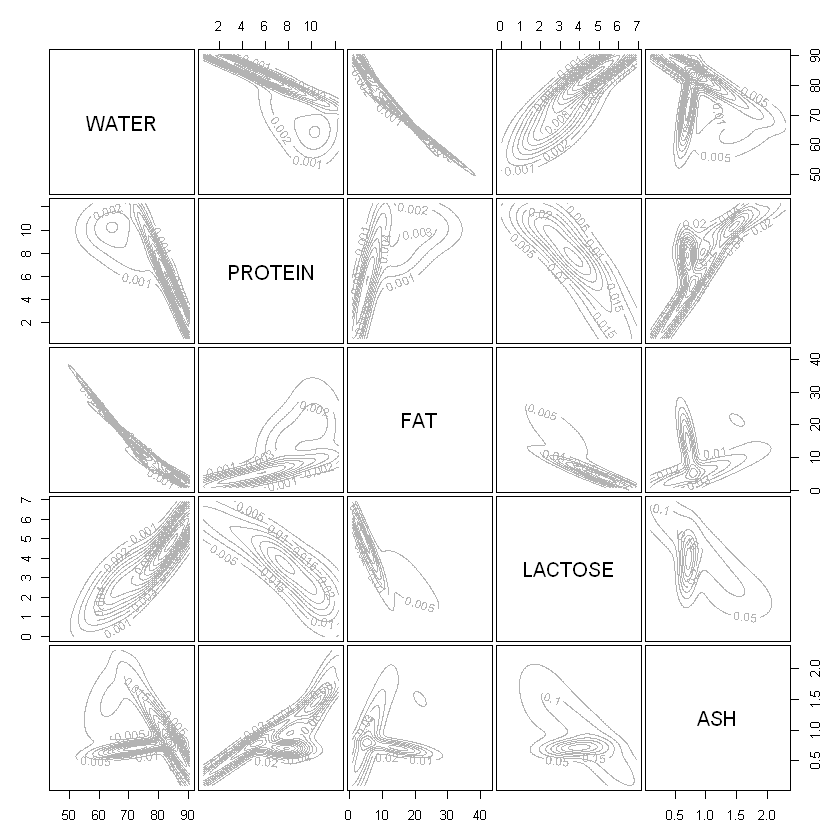

In [3]:
set.seed(1)
clus <-Mclust(datos,3)
summary(clus)
plot(clus)
clus




In [4]:
set.seed(1)
cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl


WATER,PROTEIN,FAT,LACTOSE,ASH
86.26361,3.879049,3.921919,5.221110,0.6421765
72.23683,7.520039,14.782487,3.660315,0.7079534
64.28310,10.566706,21.483587,1.983296,1.5083364


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         2          2          2          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          1          2          3          3          3 
  REINDEER      WHALE       SEAL    DOLPHIN 
         3          3          3          2

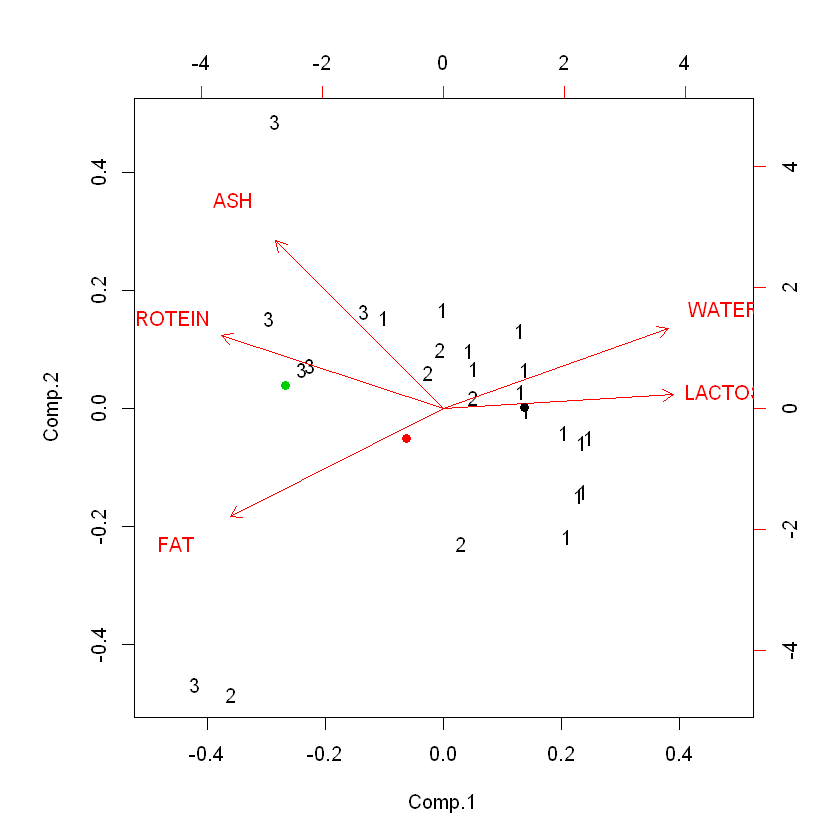

In [5]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


**Ejercicio 1:**

a) Explique como funciona el método Mclust, describa los principales parámetros de entrada y salida.

b) Interprete y comente los resultados obtenidos. 

In [96]:
help(Mclust)

### Respuesta 1.a

El método mclust nos permite realizar modelos de clustering basado en modelos de mezcla Gaussiana finitos parametrizados. Esto lo hace mediante el algoritmo EM y el modelo óptimo es seleccionado de acuerdo al BIC.

**Función:** Mclust(data, G = NULL, modelNames = NULL, prior = NULL, control = emControl(), initialization = NULL, warn = mclust.options("warn"), x =  NULL, verbose = interactive(), …)

**Principales datos de entrada:**

Data: Corresponde a un vector, matriz o dataframe de datos numéricos. No se permiten datos categóricos.

G: Vector de enteros que especifica el número de componentes (agrupaciones) para el cual se calculará el BIC. El valor por defecto es G=1:9

**Datos de salida:**

data: Matriz de datos de entrada.

modelName: Cadena de caracteres que denota el modelo del que se obtiene el mejor valor de BIC.

n: Número de observaciones en los datos.

d: Dimesión de los datos.

G: Número óptimo de componentes de la mezcla.

BIC: Todos los valore BIC.

loglik: La probabilidad logarítmica correspondiente al BIC óptimo.

df: Número de parámetros estimados.

bic: BIC del modelo seleccionado.

icl: ICL del modelo seleccionado.

parameters: Una lista de los parámetros "pro", "mean" y "variance".

z: Una matriz cuya entrada [i,k]-ésima es la probabilidad de que la observación i en los datos de prueba pertenezca a la clase k.

classification: La clasificación correspondiente a z.

uncertainty: Incertidumbre asociada a la clasificación.

### Respuesta 1.b

Segun los resultados obtenidos podemos observar que 

**----------------------------------------------------------------------------------------**

**Criterio de Información Bayesiano**

Una forma de discriminar entre posibles agrupamientos, es calcular el Criterio de Información Bayesiano, cuya expresión genérica es:
$$BIC = log L(Datos\mid \hat{\theta}) - \frac{d}{2}log(N)$$
donde $d$ es el número de parámetros libres y $N$ el número de observaciones. A medida que aumenta el número de parámetros la verosimilitud aumenta, pero esto es moderado por el término en que depende de $d$.

Mclust calcula automática el BIC para distintas configuraciones de las matrices covarianza de cada Normal multivariada (que corresponden a distintos números de parámetros) así como distinto número de grupos. Por parsimonia, es recomendable escoger el primer número de grupos que representa un máximo local.

**Ejercicio 2:**

a) Utilice Mclust sin definir el número de grupos y considere el Criterio de información Bayesiano (BIC) para decidir el número de grupos óptimo. 

b) Discuta y compare  sus resultados con aquellos obtenidos con k-means

de los datos mostrados anteriormente tenemos que :  
**N** : 25 individuos 

### Respuesta 2.a

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 9 components: 

 log-likelihood  n  df       BIC       ICL
       69.49069 25 148 -337.4122 -337.4122

Clustering table:
1 2 3 4 5 6 7 8 9 
3 3 6 3 2 1 1 4 2 

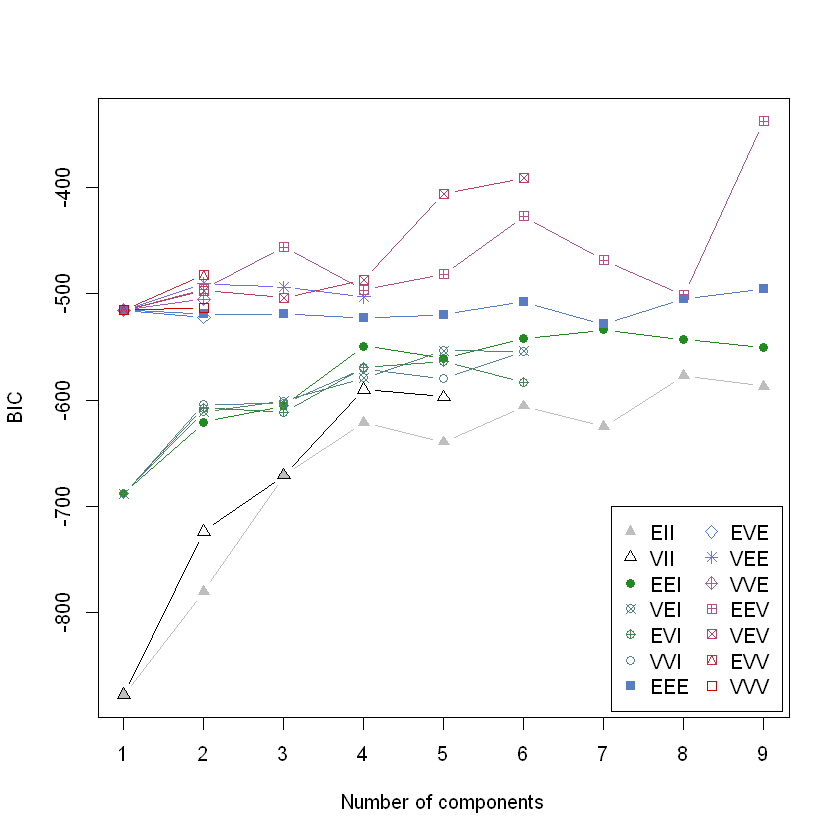

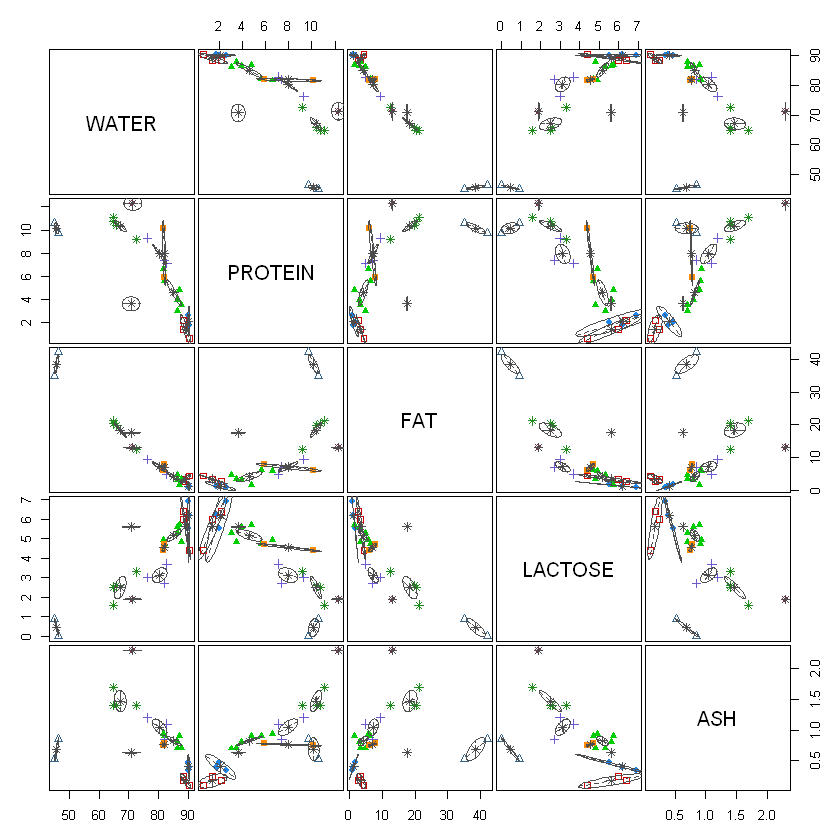

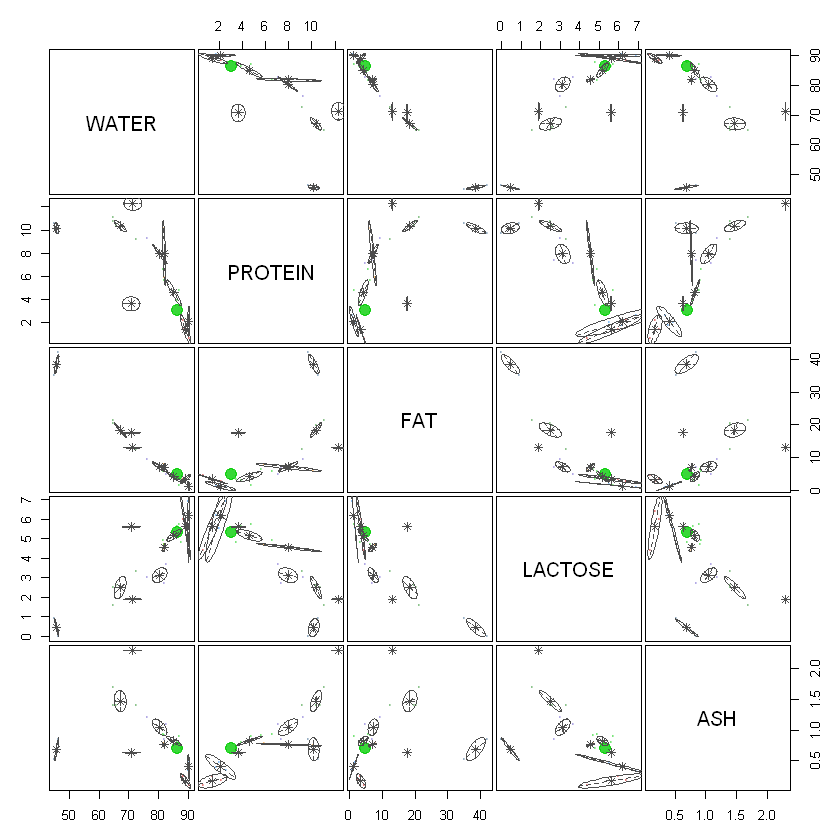

'Mclust' model object: (EEV,9) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

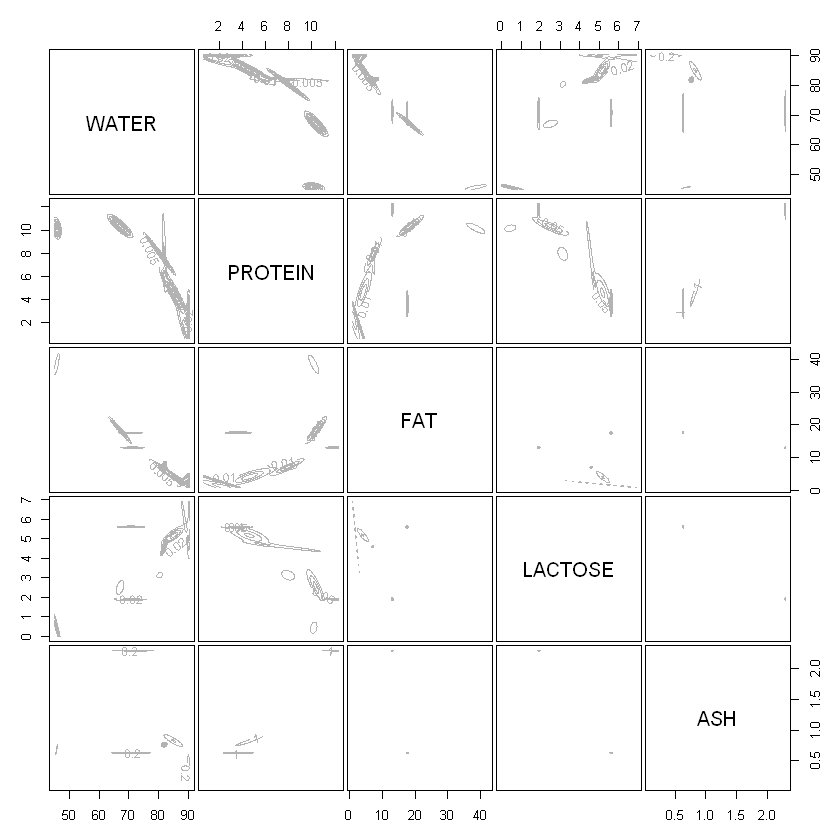

In [6]:
clus <-Mclust(datos)
summary(clus)
plot(clus)
clus


**--------------------------------------------------------------------**

**Ejercicio 3:** 

a) Explique como funciona el método hclust, describa parámetros de entrada y salida.

b) Interprete y comente los resultados obtenidos. 

c) Utilice otros parámetros en hclust y discuta como varían los resultados. 

### Respuesta 3 .a

In [7]:
help(hclust)

Esta funcion realiza un analisis de agrupamiento jerarquico utilizando un conjunto de distancias entre los n individuos, donde a cada individuo se le asignara su propio cluster y despues de forma interactiva se iran uniendo los grupos mas similares en cada etapa, esto continua hasta que haya 1 solo grupo en cada etapa

**Entrada:**  
d: Una matriz de distancia.  
method: Metodo de aglomeracion (ward.D, ward.D2, single, complete, average, mcquitty, median, centroid)

**Salida:**  
merge: una matriz que indica la fusion de los grupos  
height: el valor del criterio asociado con el metodo de agrupamiento  
order: un vector que da la permutacion de las observaciones originales adecuadas para graficar  
labels: etiquetas para los objetos que se agrupan  
call: llamada que produjo el resultado  
method: el metodo de agrupacion que fue utilizado  
dist.method: la distancia que se ha utilizado para crear d

ademas de los parametros de entrada el hclust, tambien estan los parametros de entrada del grafico

**Parametros de entrada para plot**

hang: tamaño de altura donde cuelgan las etiquetas, un valor negativo hara que cuelguen desde 0

### Respuesta 3.b

In [19]:
res3 <- hclust(dist(datos))

-4,-13
-11,-16
-2,-3
-21,-22
-6,-12
-1,1
-15,5
-8,2
-23,4
-9,-14
8,10


[1]  0.9137286  1.2043255  1.2056533  1.2922848  1.5126467  1.7275416
 [7]  2.1702765  2.1914607  2.2449944  2.5243811  3.2973323  3.3274765
[13]  3.6796739  3.7509999  4.5322070  4.7594643  6.3292970  7.0270904
[19]  7.3744424 11.0074929 13.1765891 16.5707574 33.9632154 60.7368093

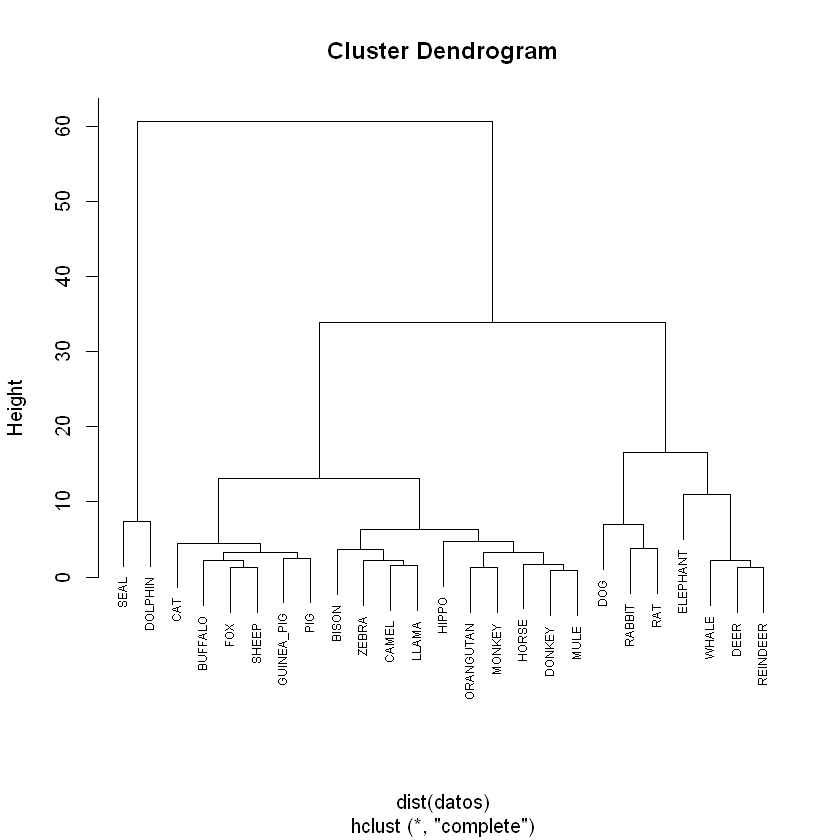

In [20]:
res3 <- hclust(dist(datos), method = 'complete')
res3$merge
res3$height
plot(res3, cex = 0.6)

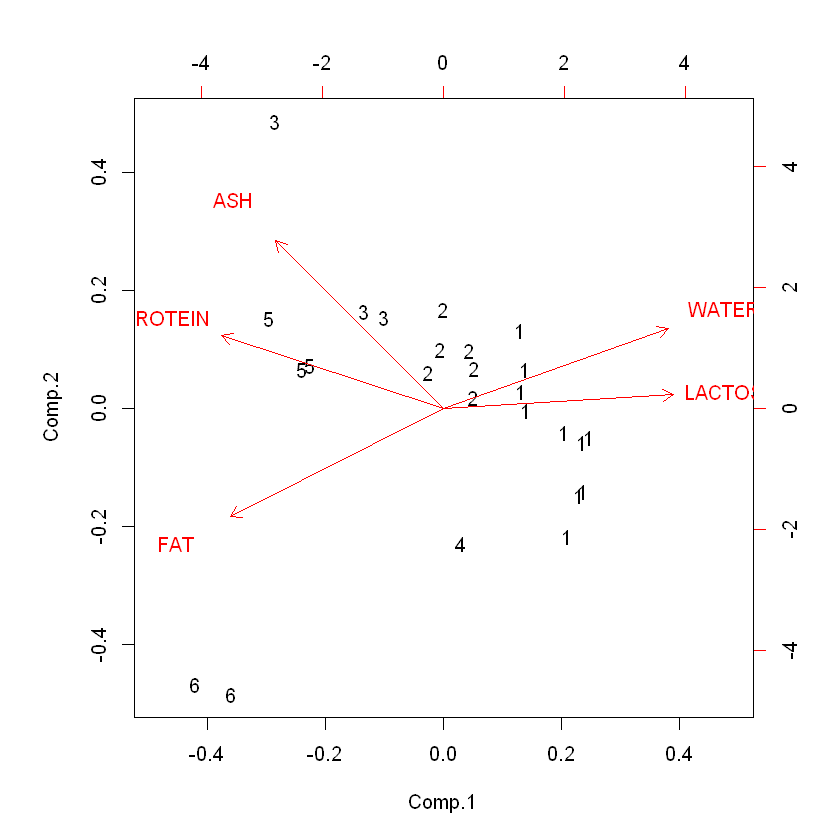

In [21]:
biplot(res, xlabs= cutree(res3,6))

In [22]:
cor(x = dist(datos), cophenetic(res3))

[1] 0.9095048

El dendograma es muy util a la hora de decidir el numero de grupos a utilizar teniendo en cuenta la forma en la que se van anidando los cluster, y la medida de similitud en la que lo hacen (Height).

De los resultados obtenidos anteriormente podemos decir que los grupos del dendograma se fueron creando con las similitudes en la leche que representaban a estos individuos, de esto podemos ver que la leche producida por la foca es similar a la producida por el delfin, esto se ve complementado con el biplot, donde nos indica que ambas presentan un nivel alto en grasa, lo cual estos animales estan representado por el **grupo 4**. Ademas en el dendograma tambien se puede apreciar que hay un grupo con numerosos de animales donde su leche es similar, estos son : gato, bufalo, zorro, oveja, conejillo de indias, cerdo, bisonte, ....mula. los cuales segun el biplot presentan un alto nivel de agua y lactosa, representados por el **grupo 1**. Luego tenemos al perro conejo y rata que presentan una similitud en proteinas, el cual es representado por el **grupo 3**, y finalmente esta el **grupo 2** que mediante el hclust se formo debido a su similitud de ASH, conformado pro la ballena, ciervo y el reno

Ademas tambien es importante mencionar que el dendograma al utilizar un metodo de aglomeracion **complete** refleja muy bien la similitud entre las observaciones ya que el coeficiente de correlacion resultante entre las alturas del arbol y las distancia originales son muy cercanas a 1

### Respuesta 3.c

In [15]:
help(plot)

-4,-13
-11,-16
-2,-3
-21,-22
-1,1
-6,-12
-23,4
-8,2
-15,6
-9,-14
3,5


[1]  0.9137286  1.2043255  1.2056533  1.2922848  1.4766533  1.5126467
 [7]  1.8062369  1.8649670  2.0285364  2.5243811  2.5788640  2.6210342
[13]  2.6475398  3.6632104  3.7509999  3.8982214  4.1810789  5.9727117
[19]  7.3744424  9.1659009 10.0893922 11.6039698 21.7332643 47.3720822

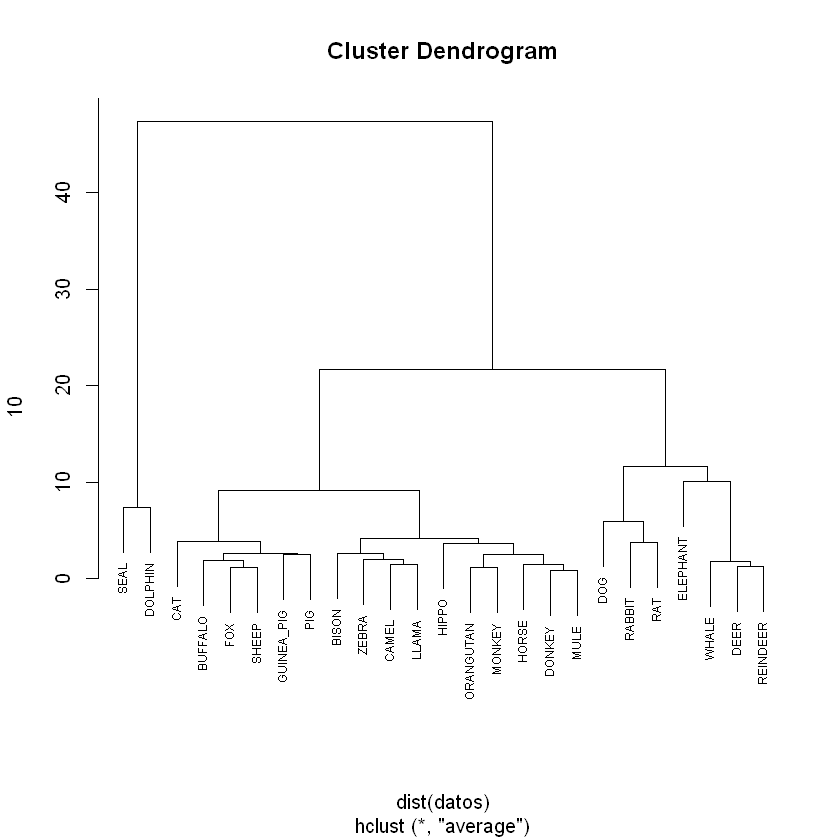

In [16]:
res3 <- hclust(dist(datos), method = 'average')
res3$merge
res3$height
plot(res3, cex = 0.6)

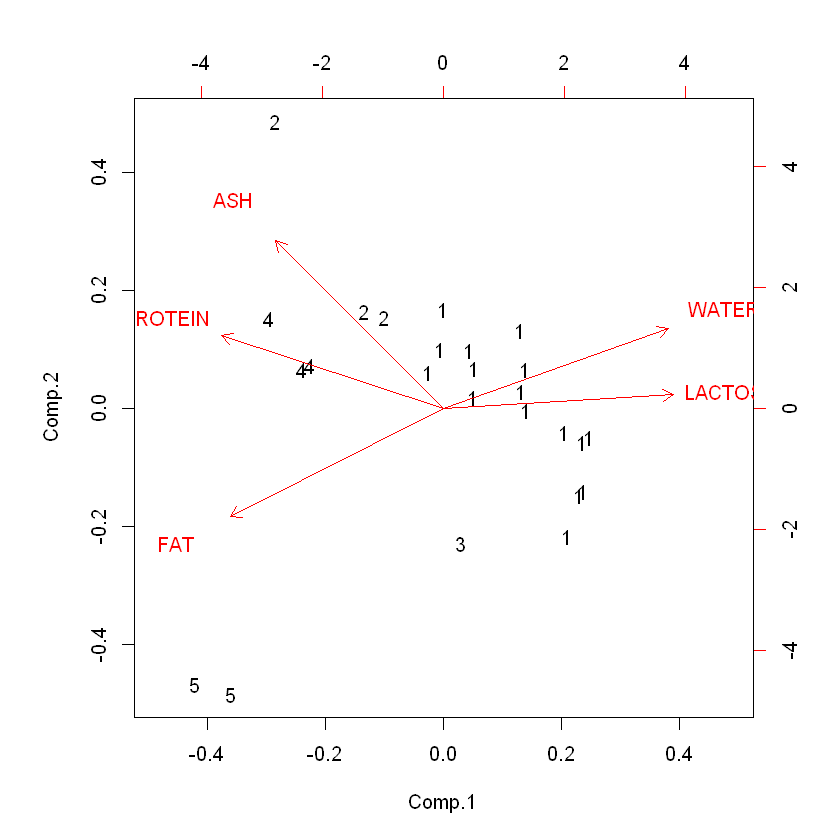

In [13]:
biplot(res, xlabs= cutree(res3,5))

In [14]:
cor(x = dist(datos), cophenetic(res3))

[1] 0.91928

Al cambiar el metodo de aglomeracion podemos ver que cambia el orden en que se ordenan los grupos, ademas de cambiar la cantidad de grupos que se obtienen al cortar el arbol en un Height especifico, por ejemplo, si corto en 10 el hclust generador por averange, obtendria 5 grupos. En cambio si corto en 10 el hclust generador por complete obtendria 6 grupos. ademas tambien podemos ver que para este caso es mejor ocupar el metodo average ya que este presenta una mejor correlacion entre las alturas del arbol y las distancia originales.

**Ejercicio 4:** (3 puntos)

a) Considere los datos comunas.csv y escoja las comunas de una sola región para realizar sus análisis. Realice un análisis de clustering con K-means, GMM y Análisis Jerárquico para dichos datos, excluyendo el índice IDSE. Interprete sus resultados.

b) Estudie las medidas de calidad propuestas en Murphy, Capítulo 25: purity, rand index y mutual information (pdf en siveducMD). Calcule alguna de las medidas de calidad estudiadas, para cada uno de los análisis realizado en (a), considerando  una categorización (IDSE_bis) de los datos según el índice IDSE, de la manera siguiente:
1. IDSE_bis = 1 si 0 <= IDSE < 0.3
2. IDSE_bis = 2 si 0.3 <= IDSE < 0.4
3. IDSE_bis = 3 si 0.4 <= IDSE < 0.5
4. IDSE_bis = 4 si 0.5 <= IDSE < 0.6
5. IDSE_bis = 5 si 0.6 <= IDSE < 0.7
6. IDSE_bis = 6 si 0.7 <= IDSE < 0.8
7. IDSE_bis = 7 si 0.8 <= IDSE < 0.9
8. IDSE_bis = 8 si 0.9 <= IDSE < 1


Discuta sus resultados.

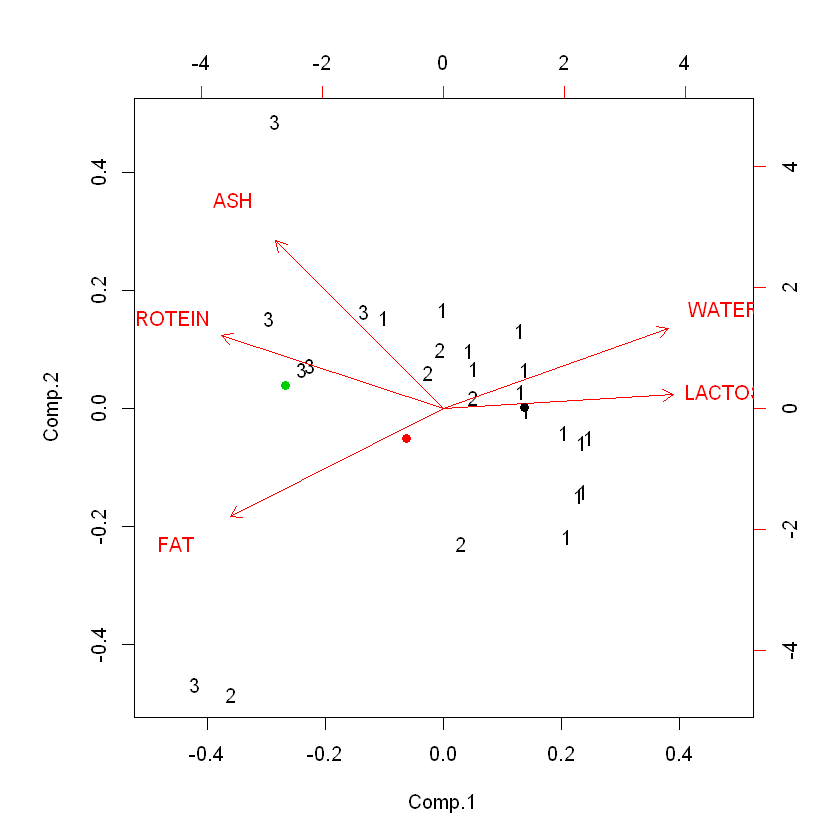

In [6]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


## **Respuesta 4.1**

### **Limpieza de Datos**

In [23]:
datos <- read.csv("comunas.csv",header=TRUE,sep=";",dec=".")

In [24]:
value <- datos[,1] == 14
datos_fil <- datos[value, c(3,5,6,7,8,9,10,11,12,13,14)]
row.names(datos_fil) <- c('Valdivia', 'Los Lagos', 'Mafil', 'Paillaco', 'Linares', 'Lanco', 'Rio Bueno', 'La Union',
                          'Mariquina','Futrono','Corral','Panguipulli','Lago Ranco')
colnames(datos_fil) <- c('Poblacion en miles de habitantes','Ingreso por persona mensual(miles $)','Porcentaje de pobreza',
                         'Escolaridad','Material de vivienda bueno o aceptable','Porcentaje de alcantarillado o fosa septica',
                         'Esperanza de vida al nacer','Indice de desarrollo humano', 'Tasa AVPP x1000h',
                         'Porcentaje de defuncion +50', 'Mortalidad Infantil x1000NV')
datos_box <- datos_fil
colnames(datos_box) <- c('V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11')

In [25]:
dim(datos_box)
summary(datos_box)
datos_fil

[1] 13 11

       V1              V2              V3             V4        
 Min.   :  5.0   Min.   :115.0   Min.   :15.7   Min.   : 7.700  
 1st Qu.: 15.8   1st Qu.:134.9   1st Qu.:19.2   1st Qu.: 8.100  
 Median : 19.9   Median :145.5   Median :20.2   Median : 8.400  
 Mean   : 36.3   Mean   :145.7   Mean   :19.9   Mean   : 8.569  
 3rd Qu.: 35.1   3rd Qu.:152.4   3rd Qu.:21.2   3rd Qu.: 8.700  
 Max.   :161.7   Max.   :202.7   Max.   :23.8   Max.   :10.600  
       V5              V6              V7              V8        
 Min.   :74.60   Min.   :49.00   Min.   :71.90   Min.   :0.3720  
 1st Qu.:81.20   1st Qu.:66.50   1st Qu.:74.90   1st Qu.:0.4280  
 Median :87.20   Median :75.20   Median :75.90   Median :0.4370  
 Mean   :86.25   Mean   :73.56   Mean   :75.35   Mean   :0.4465  
 3rd Qu.:91.30   3rd Qu.:79.30   3rd Qu.:76.40   3rd Qu.:0.4750  
 Max.   :94.90   Max.   :95.30   Max.   :76.80   Max.   :0.5730  
       V9              V10             V11      
 Min.   : 66.10   Min.   :69.90   

,Poblacion en miles de habitantes,Ingreso por persona mensual(miles $),Porcentaje de pobreza,Escolaridad,Material de vivienda bueno o aceptable,Porcentaje de alcantarillado o fosa septica,Esperanza de vida al nacer,Indice de desarrollo humano,Tasa AVPP x1000h,Porcentaje de defuncion +50,Mortalidad Infantil x1000NV
Valdivia,161.7,202.7,17.1,10.6,88.7,95.3,76.8,0.573,78.9,75.5,6.9
Los Lagos,21.7,149.8,15.7,8.4,91.8,84.5,76.7,0.486,72.5,77.3,7.1
Mafil,7.0,158.6,16.5,8.7,88.7,75.2,71.9,0.401,99.8,79.3,7.9
Paillaco,19.9,139.1,19.3,8.6,92.4,78.4,75.1,0.442,100.7,80.1,10.2
Linares,91.1,145.5,23.8,9.2,74.6,85.9,76.6,0.476,87.3,77.2,8.7
Lanco,16.6,137.3,20.5,8.7,91.3,75.3,74.9,0.436,90.7,72.5,5.4
Rio Bueno,31.3,146.1,21.2,8.1,94.9,79.3,75.4,0.428,96.5,76.4,6.1
La Union,38.8,156.5,19.6,8.9,77.4,70.7,75.9,0.475,91.9,78.6,7.4
Mariquina,18.4,152.4,20.2,8.4,87.2,66.5,74.9,0.437,98.2,77.9,13.7
Futrono,15.8,129.9,20.8,8.3,79.6,70.7,75.9,0.438,73.8,69.9,0.0


## Clustering

###  K-Means

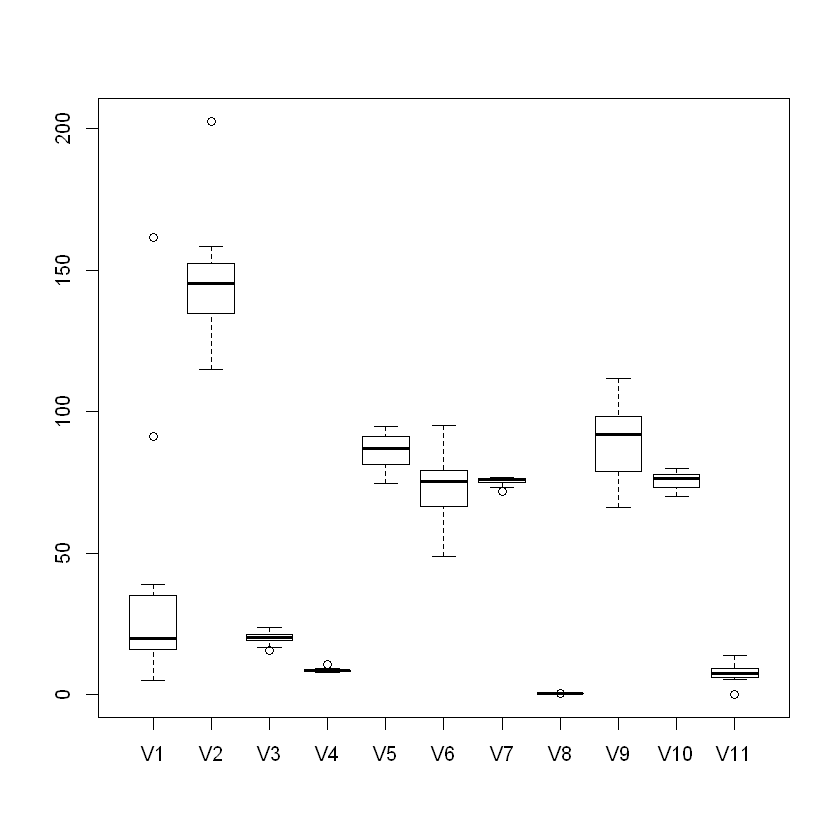

In [26]:
boxplot(datos_box)

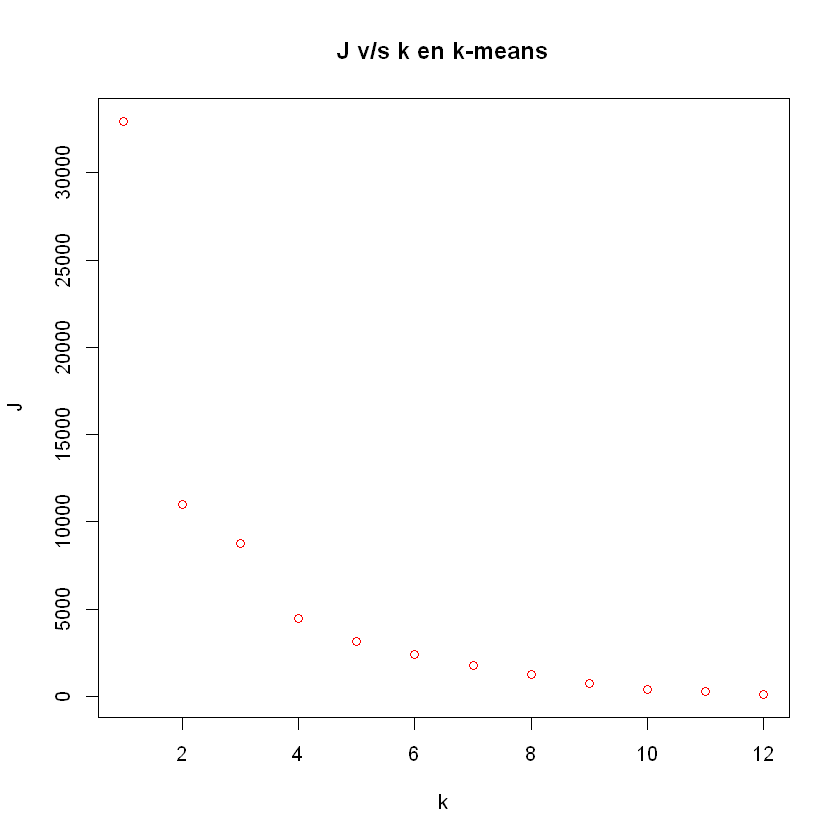

In [27]:
J<-rep(0,12)
fin_iter<-12
for (k in 1:fin_iter){
    cl<-kmeans(datos_box,k,iter.max=1000,nstart=10)
    J[k]<-cl$tot.withinss
}
plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

In [28]:
#c: criterio de porcentaje de mejora en función de perdida respecto al k anterior
kideal<-function(wss, c){
    ki<-2  #partiendo de la base que k debería ser al menos dos para el funcionamiento de kmeans 
    i<-3
    n <- 1-(wss[i]/wss[i-1])
    while (n>=c && i<length(wss)){
        ki<-i
        i<-i+1
        n <- 1-(wss[i]/wss[i-1])
    }
    ki
}
ki<-kideal(J, 0.5)
ki

[1] 2

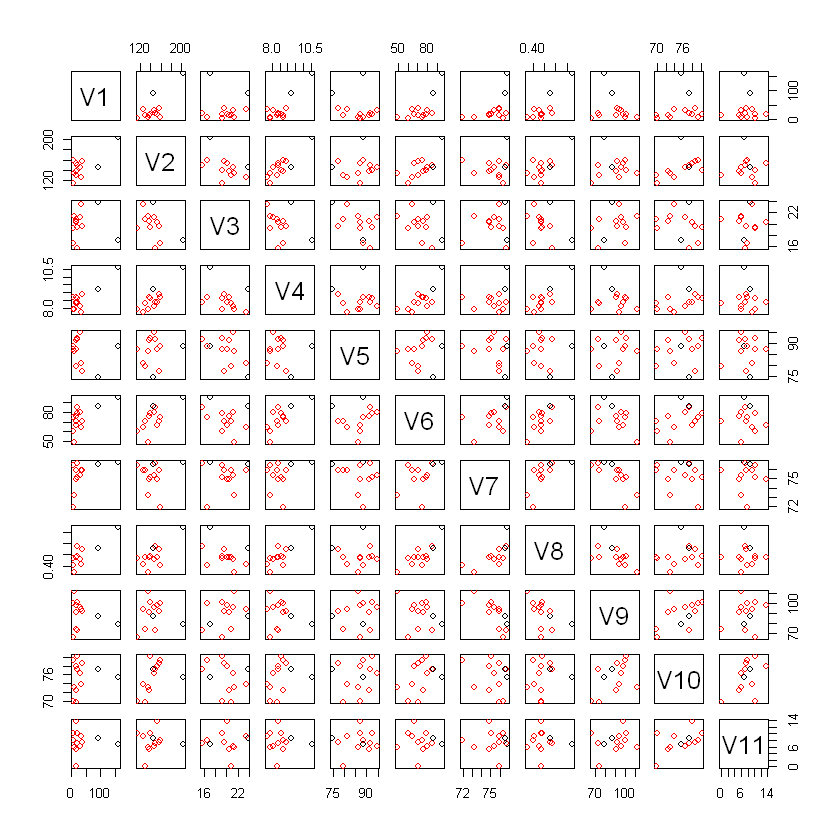

In [29]:
#ingresar valor de k0 
set.seed(2)
cl_i<-kmeans(datos_box,ki,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos_box,col=cl_i$cluster)

## Analisis Componentes principales

Call:
princomp(x = datos_box, cor = TRUE)

Standard deviations:
     Comp.1      Comp.2      Comp.3      Comp.4      Comp.5      Comp.6 
2.174041599 1.544435203 1.226162137 1.036851415 0.736173733 0.696410724 
     Comp.7      Comp.8      Comp.9     Comp.10     Comp.11 
0.415336986 0.269077537 0.182040469 0.068701103 0.004776728 

 11  variables and  13 observations.


Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11
3.8279555,0.6316765,1.2437028,0.24471327,0.15718720,0.24677804,0.26631303,0.041857458,0.07830219,0.010691474,0.0027488771
-0.6959919,-0.1148503,-0.2261278,-0.04449332,-0.02857949,-0.04486873,-0.04842055,-0.007610447,-0.01423676,-0.001943904,-0.0004997958


K-means clustering with 2 clusters of sizes 2, 11

Cluster means:
         V1       V2    V3       V4       V5       V6       V7        V8
1 126.40000 174.1000 20.45 9.900000 81.65000 90.60000 76.70000 0.5245000
2  19.91818 140.5545 19.80 8.327273 87.09091 70.46364 75.10909 0.4323636
        V9      V10      V11
1 83.10000 76.35000 7.800000
2 90.53636 75.35455 7.563636

Clustering vector:
   Valdivia   Los Lagos       Mafil    Paillaco     Linares       Lanco 
          1           2           2           2           1           2 
  Rio Bueno    La Union   Mariquina     Futrono      Corral Panguipulli 
          2           2           2           2           2           2 
 Lago Ranco 
          2 

Within cluster sum of squares by cluster:
[1] 4333.480 6676.857
 (between_SS / total_SS =  66.6 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

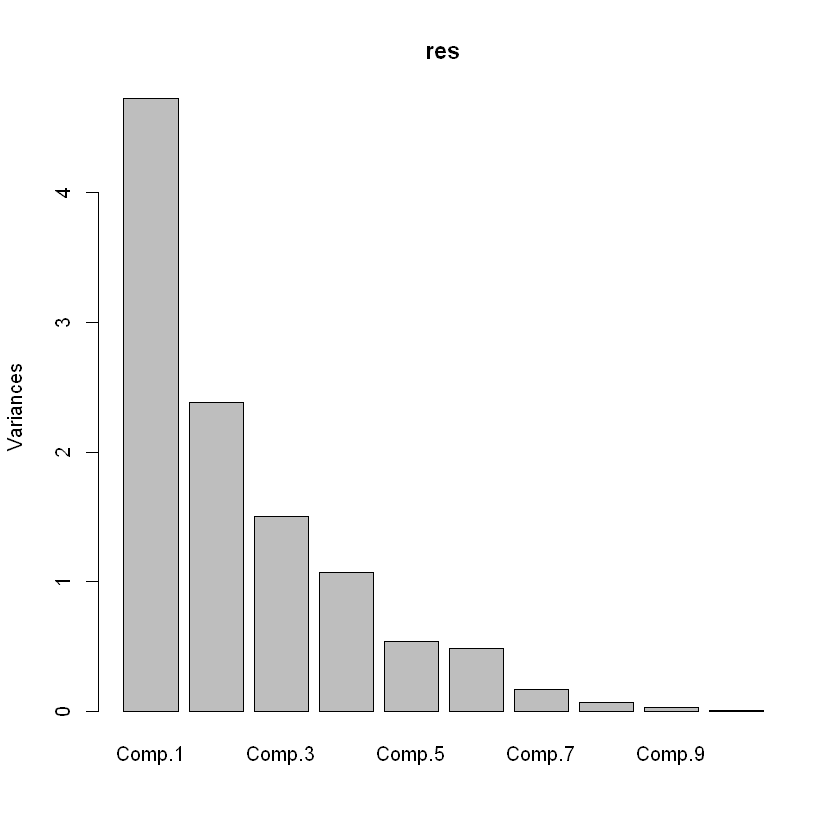

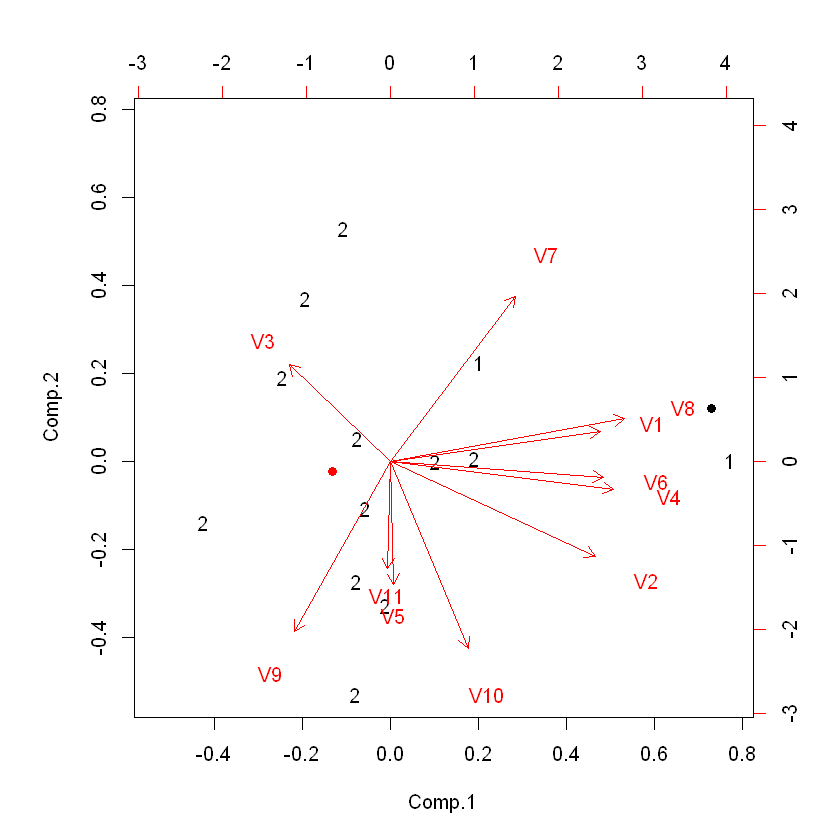

In [42]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos_box, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl_i$centers)
res2
cl_i
biplot(res,xlabs=cl_i$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:ki,pch=19)

## GMM

## Analisis jerarquico

In [45]:
res3 <- hclust(dist(datos_fil))

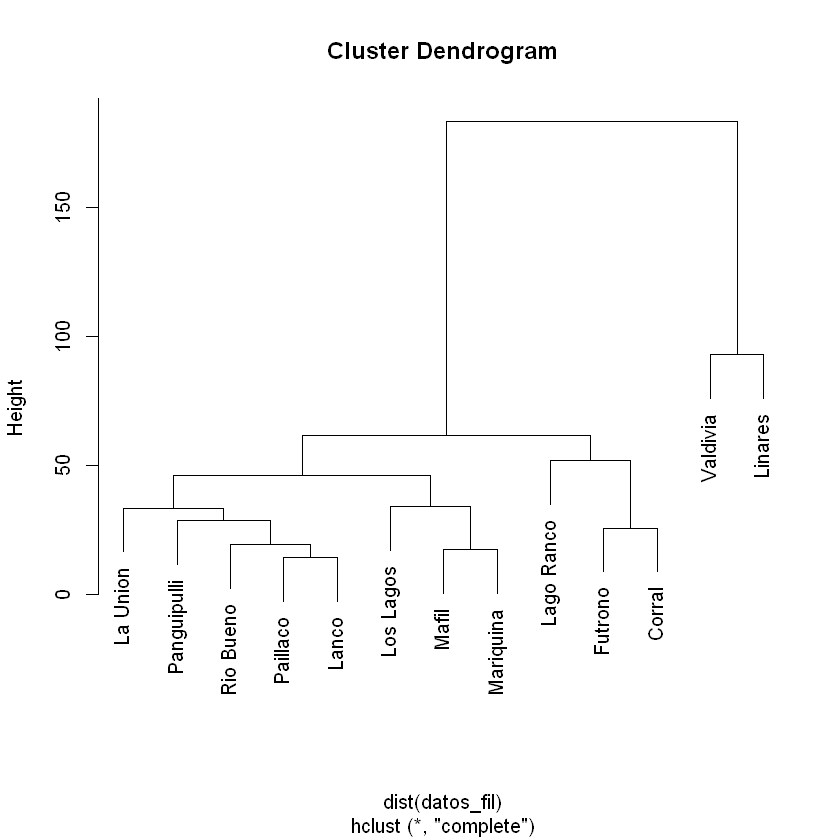

In [46]:
plot(res3)

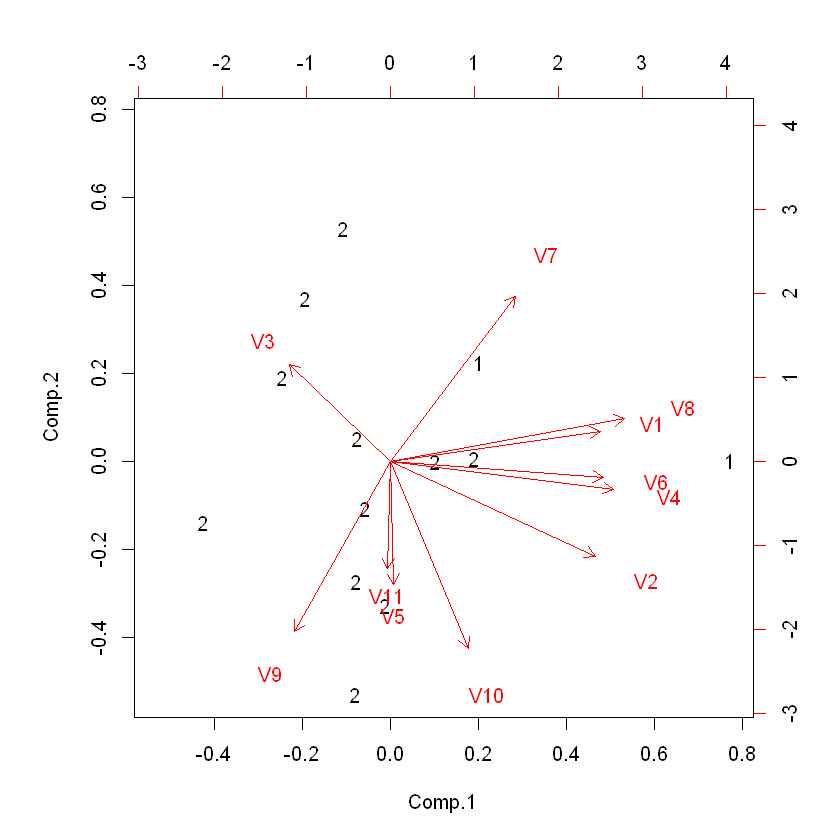

In [52]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos_box, cor=TRUE)
biplot(res, xlabs= cutree(res3,2))